In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/BIKE DETAILS.csv'
df = pd.read_csv(file_path)

In [7]:
print("🔍 Preview of data:")
display(df.head())


🔍 Preview of data:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
#Q1 What is the range of selling prices in the dataset?
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Find the range of selling prices
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()

print(f"Range of selling prices: ₹{min_price} to ₹{max_price}")

Range of selling prices: ₹5000 to ₹760000


In [8]:
#Q2 What is the median selling price for bikes in the dataset?
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate median selling price
median_price = df['selling_price'].median()

print(f"Median Selling Price: ₹{median_price}")

Median Selling Price: ₹45000.0


In [9]:
#Q3 What is the most common seller type
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Find the most common seller type
most_common_seller = df['seller_type'].mode()[0]

print(f"Most Common Seller Type: {most_common_seller}")

Most Common Seller Type: Individual


In [10]:
#Q4How many bikes have driven more than 50,000 kilometers
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Count bikes with more than 50,000 km driven
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]

print(f"Number of bikes driven more than 50,000 km: {bikes_above_50k}")

Number of bikes driven more than 50,000 km: 170


In [11]:
#Q5 What is the average km_driven value for each ownership type
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate average km_driven by ownership type
average_km_by_owner = df.groupby('owner')['km_driven'].mean().round(2)

print("Average km_driven for each ownership type:")
print(average_km_by_owner)

Average km_driven for each ownership type:
owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64


In [12]:
#Q6-What proportion of bikes are from the year 2015 or older
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate proportion of bikes from 2015 or earlier
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion = bikes_2015_or_older / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")

Proportion of bikes from 2015 or older: 56.64%


🔍 Missing Values Trend:
                   Missing Values  Percentage
ex_showroom_price             435        41.0
selling_price                   0         0.0
name                            0         0.0
year                            0         0.0
seller_type                     0         0.0
owner                           0         0.0
km_driven                       0         0.0


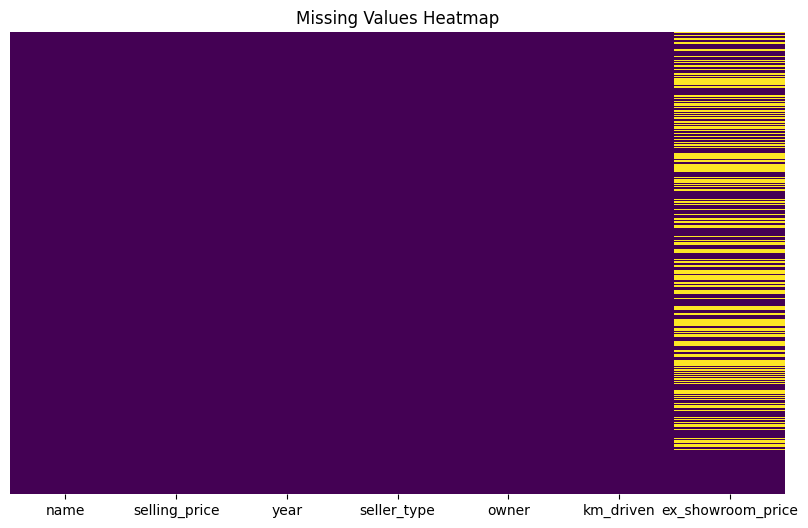

In [13]:
#Q7-What is the trend of missing values across the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values(by='Missing Values', ascending=False)

print("🔍 Missing Values Trend:")
print(missing_df)

# Optional: Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
#q8 What is the highest ex_showroom_price recorded, and for which bike


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Find the row with the highest ex_showroom_price
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Extract details
bike_name = max_price_row['name']
max_price = max_price_row['ex_showroom_price']

print(f"🚲 Bike with the highest ex_showroom_price:")
print(f"Name: {bike_name}")
print(f"Ex-Showroom Price: ₹{max_price}")


🚲 Bike with the highest ex_showroom_price:
Name: Harley-Davidson Street Bob
Ex-Showroom Price: ₹1278000.0


In [16]:
#9 What is the total number of bikes listed by each seller type


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Count bikes by seller type
seller_counts = df['seller_type'].value_counts()

print("📊 Total number of bikes listed by each seller type:")
print(seller_counts)


📊 Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


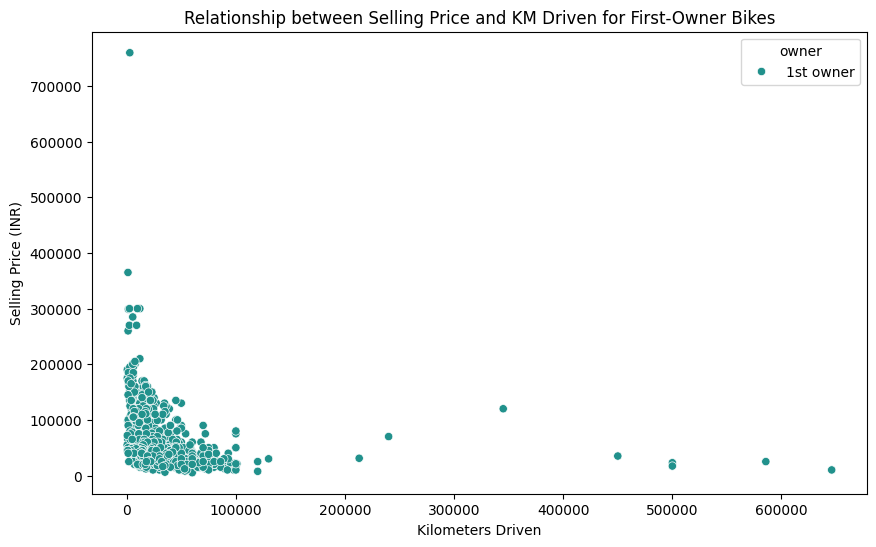

In [17]:
#Q10 What is the relationship between selling_price and km_driven for first-owner bikes

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Filter the data for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Plot the relationship between selling_price and km_driven for first-owner bikes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', hue='owner', palette='viridis')
plt.title("Relationship between Selling Price and KM Driven for First-Owner Bikes")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.show()


In [18]:
#Q11  Identify and remove outliers in the km_driven column using the IQR method
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the rows where km_driven is outside the bounds
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Show the number of rows before and after removing outliers
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size (after removing outliers): {df_cleaned.shape[0]}")

# Optionally, you can save the cleaned dataset
# df_cleaned.to_csv("cleaned_bike_details.csv", index=False)


Original dataset size: 1061
Cleaned dataset size (after removing outliers): 1022


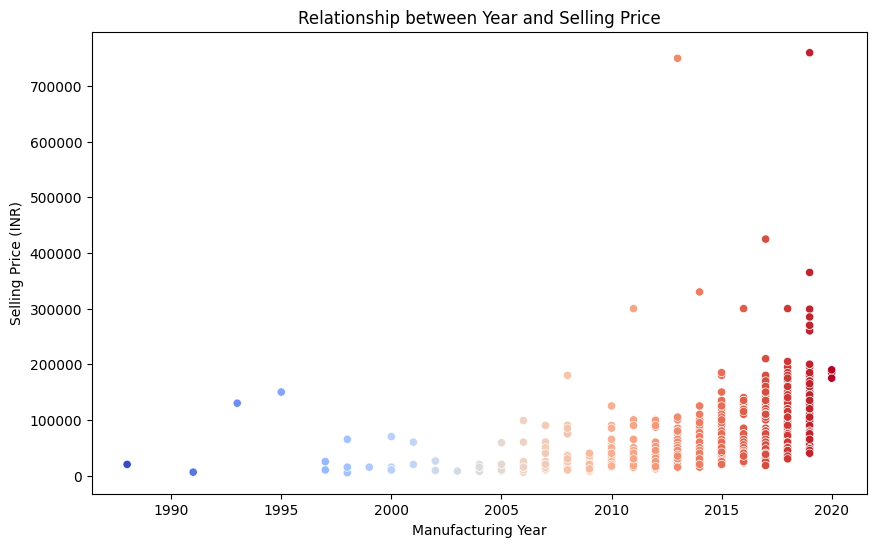

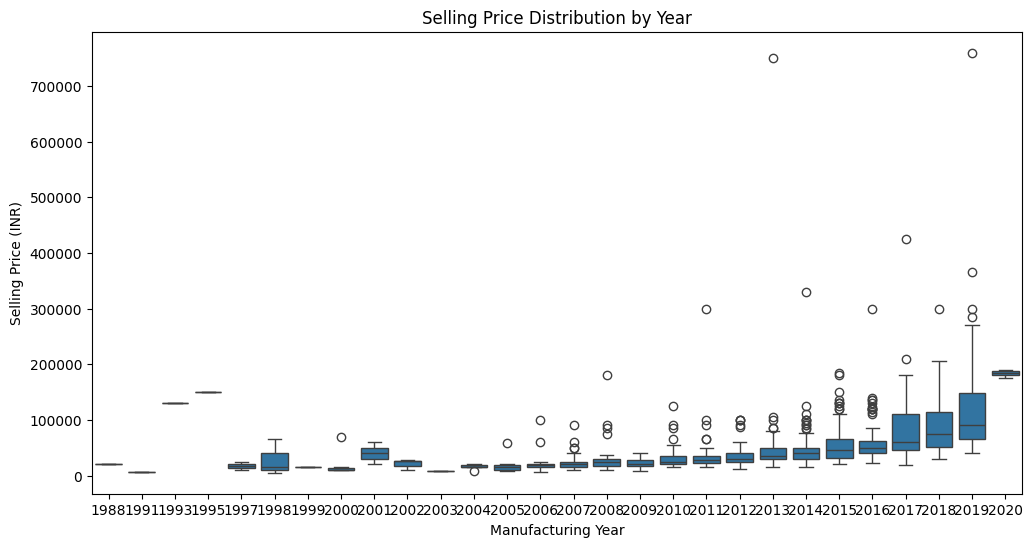

In [19]:
#Q12 Perform a bivariate analysis to visualize the relationship between year and selling_price

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Scatter plot to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', hue='year', palette='coolwarm', legend=False)
plt.title("Relationship between Year and Selling Price")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.show()

# Box plot to visualize distribution of selling_price for each year
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title("Selling Price Distribution by Year")
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.show()


In [20]:
#Q13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Get the current year
current_year = 2025  # You can dynamically get the current year with datetime if needed

# Calculate the age of the bike
df['age'] = current_year - df['year']

# Calculate depreciation in selling price (difference between ex_showroom_price and selling_price)
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Calculate the average depreciation for bikes
average_depreciation = df['depreciation'].mean()

print(f"🚲 Average depreciation in selling price: ₹{average_depreciation:.2f}")


🚲 Average depreciation in selling price: ₹28513.55


In [35]:
#Q14 Which bike names are priced significantly above the average price for their manufacturing year


# Clean column names to match the format
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate the average selling price for each year
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_per_year.columns = ['year', 'selling_price_avg']  # Rename column for clarity

# Merge the original dataset with the average selling price per year
df = pd.merge(df, avg_price_per_year, on='year', how='left')

# Define a threshold for 'significantly above the average', for example, 20% above the average price
threshold = 1.2

# Filter bikes priced significantly above the average for their manufacturing year
above_avg_bikes = df[df['selling_price'] > threshold * df['selling_price_avg']]

# Display the bike names (using 'name' column) of the bikes priced above average
significantly_priced_bikes = above_avg_bikes[['name', 'selling_price', 'selling_price_avg']]

print("🚲 Bikes priced significantly above the average price for their manufacturing year:")
print(significantly_priced_bikes)


🚲 Bikes priced significantly above the average price for their manufacturing year:
                                      name  selling_price  selling_price_avg
0                Royal Enfield Classic 350         175000      119689.511628
2      Royal Enfield Classic Gunmetal Grey         150000       87660.374046
7     Royal Enfield Bullet 350 [2007-2011]         180000       34289.285714
13                           Yamaha YZF R3         365000      119689.511628
17                        Yamaha YZF R15 S          40000       31793.333333
...                                    ...            ...                ...
984              Royal Enfield Classic 500          95000       48668.131868
985              Royal Enfield Classic 500          90000       35655.721311
1005                    TVS Apache RTR 160          60000       48668.131868
1008                    Bajaj Pulsar 220 F          52000       35748.400000
1023                Bajaj Avenger 220 dtsi          45000       35748.

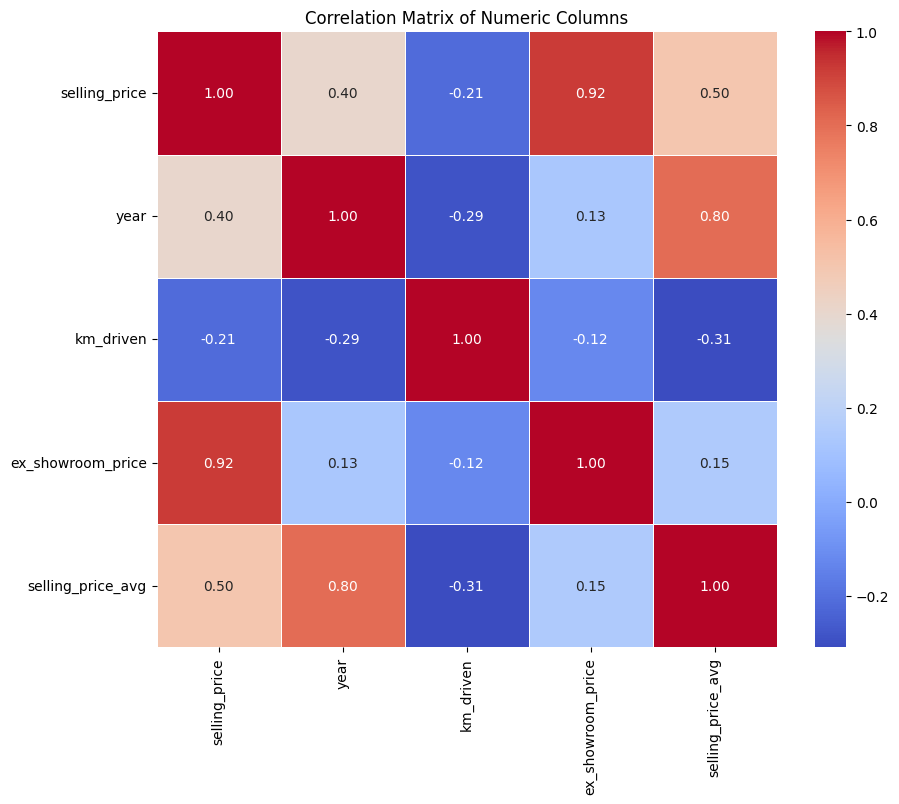

In [36]:
#Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap


# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Display the heatmap
plt.title("Correlation Matrix of Numeric Columns")
plt.show()
